# Classificação de imagem com rede neural convolucional

In [ ]:
# Instalar tensorflow pelo pip

In [ ]:
pip install tensorflow

In [ ]:
# Importar todas as bibliotecas

In [3]:
import matplotlib.pyplot as plt #pyplot para plotar gráficos
import numpy as np #numpy para manipulação avançada de números em python
import os #os para acessar o disco do pc
import PIL #PIL biblioteca de imagens do python
import tensorflow as tf #tensorflow é a biblioteca de redes neurais

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#Baixamos um dataset de 3670 imagens

In [32]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


In [5]:
#Podemos abrir algumas das imagens para garantir que está tudo certo

3670


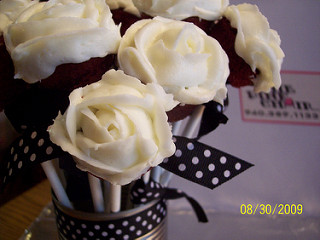

In [37]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))
#PIL.Image.open(str(roses[1]))
#tulips = list(data_dir.glob('tulips/*'))
#PIL.Image.open(str(tulips[0]))
#PIL.Image.open(str(tulips[1]))


In [ ]:
#Definimos alguns parametros que serão usados em todo o modelo

In [10]:
batch_size = 32 #Número de amostras usadas por treinamento (batch)
img_height = 180 #Altura da imagem
img_width = 180 #Largura da imagem

In [ ]:
#Separamos do dataset 80% das amostras para treinamento...

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
#e 20% para validação.

In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
#Podemos imprimir os nomes das classificações do dataset

In [14]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
#Podemos mostrar algumas imagens e garantir que batem com suas classificações.

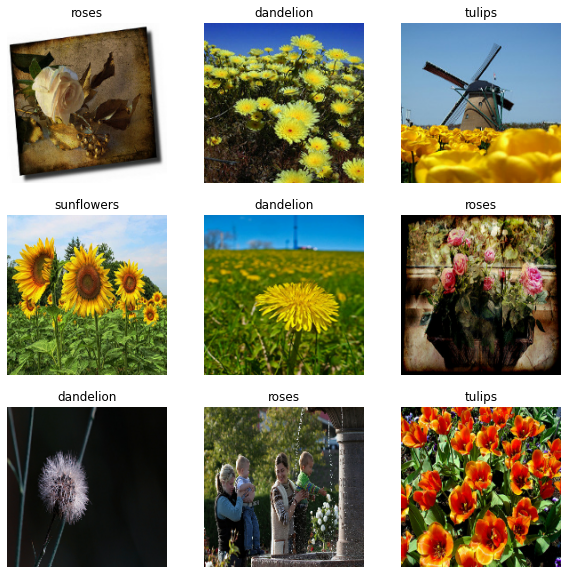

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
#Utiliza a função prefetch para melhorar a transferencia de amostras entre a CPU/GPU e o disco,

In [16]:
AUTOTUNE = tf.data.AUTOTUNE #Autotune consiste em determinar que o tamanho deve ser ajustado em tempo de execução.
#Embaralhamos e ajustamos o prefetch para buscar a proxima batch em simultaneo com a execução da anterior.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) 
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Agora cria-se o modelo sequencial em camadas

In [19]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),#Normaliza-se os dados de 0 a 255 para 0 a 1
  layers.Conv2D(16, 3, padding='same', activation='relu'),#Primeira camada convolucional
  layers.MaxPooling2D(), #Primeira camada de pooling
  layers.Conv2D(32, 3, padding='same', activation='relu'),#Segunda camada convolucional
  layers.MaxPooling2D(), #Segunda camada de pooling
  layers.Conv2D(64, 3, padding='same', activation='relu'),#Terceira camada convolucional
  layers.MaxPooling2D(), #Terceira camada de pooling
  layers.Flatten(), #Redimensiona em uma dimensão para as camadas densas
  layers.Dense(128, activation='relu'), #Camada densa
  layers.Dense(num_classes) #Probabilidades
])

In [ ]:
#Escolhemos o otimizador ADAM e a função de perda

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
#Decide-se o número de epochs e se treina o modelo

In [22]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2022-03-10 15:13:41.572986: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 66355200 exceeds 10% of free system memory.
2022-03-10 15:13:41.660701: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33177600 exceeds 10% of free system memory.
2022-03-10 15:13:41.811442: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33177600 exceeds 10% of free system memory.
2022-03-10 15:13:41.937282: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33177600 exceeds 10% of free system memory.
2022-03-10 15:13:41.937346: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 66355200 exceeds 10% of free system memory.


92/92 [==============================] - 38s 407ms/step - loss: 1.5432 - accuracy: 0.3280 - val_loss: 1.3429 - val_accuracy: 0.4387
Epoch 2/10
92/92 [==============================] - 40s 439ms/step - loss: 1.1211 - accuracy: 0.5651 - val_loss: 1.1149 - val_accuracy: 0.5722
Epoch 3/10
92/92 [==============================] - 40s 439ms/step - loss: 0.8639 - accuracy: 0.6638 - val_loss: 1.0106 - val_accuracy: 0.6485
Epoch 4/10
92/92 [==============================] - 40s 438ms/step - loss: 0.5975 - accuracy: 0.7841 - val_loss: 1.1396 - val_accuracy: 0.6144
Epoch 5/10
92/92 [==============================] - 41s 445ms/step - loss: 0.4045 - accuracy: 0.8634 - val_loss: 1.2933 - val_accuracy: 0.5995
Epoch 6/10
92/92 [==============================] - 41s 449ms/step - loss: 0.2487 - accuracy: 0.9189 - val_loss: 1.4705 - val_accuracy: 0.6281
Epoch 7/10
92/92 [==============================] - 40s 435ms/step - loss: 0.1267 - accuracy: 0.9612 - val_loss: 1.8945 - val_accuracy: 0.6240
Epoch 8/10

In [ ]:
#Geramos o gráfico que compara a precisão do treino com a do teste

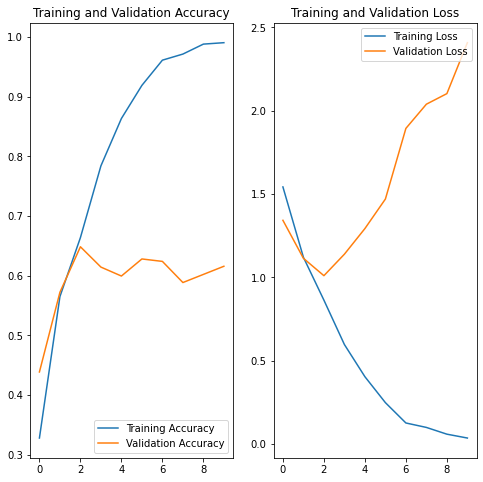

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
#Nos gráficos vemos características de overfitting, e para corrigir faremos alguns passos:

In [ ]:
#Criar mais amostras a partir do dataset original (Neste caso usando modificações leves em cada uma)

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
#Aqui vemos algumas das modificações feitas

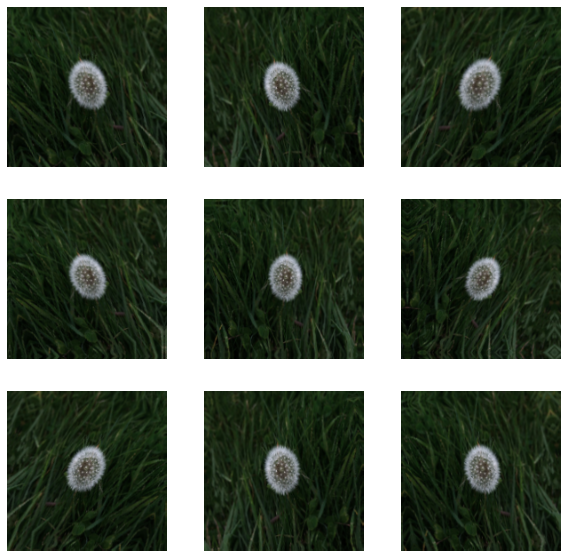

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
#O segundo processo de amenizar overfitting, é aplicar uma camada extra de dropout (20%) antes das camadas densas.

In [26]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
#Refazemos os passos anteriores

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [28]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
#Treinamos o novo modelo, agora com mais amostras, aplicando uma camada de dropout e com mais epochs.

In [29]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 48s 513ms/step - loss: 1.3279 - accuracy: 0.4322 - val_loss: 1.0796 - val_accuracy: 0.5681
Epoch 2/15
92/92 [==============================] - 47s 510ms/step - loss: 1.0356 - accuracy: 0.5899 - val_loss: 1.0363 - val_accuracy: 0.5804
Epoch 3/15
92/92 [==============================] - 47s 511ms/step - loss: 0.9490 - accuracy: 0.6335 - val_loss: 0.9741 - val_accuracy: 0.6076
Epoch 4/15
92/92 [==============================] - 42s 456ms/step - loss: 0.9092 - accuracy: 0.6451 - val_loss: 0.9342 - val_accuracy: 0.6403
Epoch 5/15
92/92 [==============================] - 40s 431ms/step - loss: 0.8383 - accuracy: 0.6771 - val_loss: 0.8870 - val_accuracy: 0.6512
Epoch 6/15
92/92 [==============================] - 40s 432ms/step - loss: 0.7882 - accuracy: 0.7033 - val_loss: 0.8770 - val_accuracy: 0.6621
Epoch 7/15
92/92 [==============================] - 39s 429ms/step - loss: 0.7698 - accuracy: 0.7047 - val_loss: 0.8232 - val_accuracy: 0.6989

In [ ]:
#Agora para vizualizar a precisão do novo modelo:

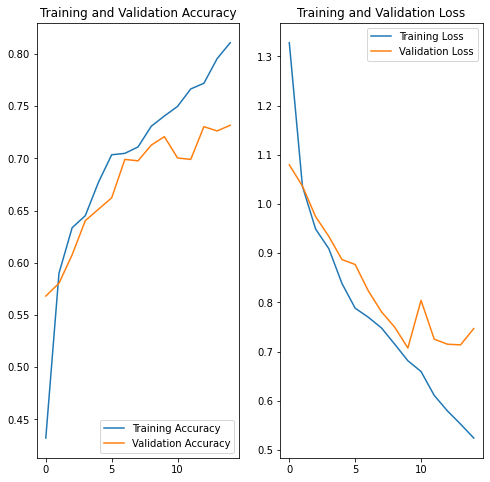

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Agora a precisão de treinamento e validação estão considerávelmente mais próximos, para melhorar ainda mais a performance do modelo seria necessário testar configurações diferentes para as camadas e valores selecionados (fine-tuning)

In [ ]:
#Para finalizar testamos o modelo com uma imagem que nunca viu antes e vemos o resultado

In [31]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


131072/117948 [=================================] - 0s 1us/step
This image most likely belongs to sunflowers with a 99.21 percent confidence.
